In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import datetime

In [2]:
#abro la conexión
con = sqlite3.connect("database/ALUAR.db")

In [123]:
#query a la db retorna un dataframe
df1 = pd.read_sql_query("select INDPOT, DH5MN, IMFC, UMFC, RMFC  from '5mn' where INDPOT = 1", con)

In [124]:
#query a la db retorna un dataframe
df2 = pd.read_sql_query("select INDPOT, FT_TURNO, TU_SEMI_TURNO, CUBA, RRM, AGEBSQ from 'HITM_PS' where CUBA > 7000 and INDPOT = 1", con)

In [125]:
df1.head()

,INDPOT,DH5MN,IMFC,UMFC,RMFC
0,1,2020-07-11 06:51:37,219.9,4.316,12.181
1,1,2020-07-11 06:56:37,218.9,4.294,12.116
2,1,2020-07-11 07:01:39,212.6,4.179,11.827
3,1,2020-07-11 07:07:40,214.7,4.224,11.954
4,1,2020-07-11 07:12:40,216.4,4.267,12.099


In [126]:
df1.head()

,INDPOT,DH5MN,IMFC,UMFC,RMFC
0,1,2020-07-11 06:51:37,219.9,4.316,12.181
1,1,2020-07-11 06:56:37,218.9,4.294,12.116
2,1,2020-07-11 07:01:39,212.6,4.179,11.827
3,1,2020-07-11 07:07:40,214.7,4.224,11.954
4,1,2020-07-11 07:12:40,216.4,4.267,12.099


In [127]:
def func1(x):
    return datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [128]:
df1["DH5MN_date"] = df1["DH5MN"].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [135]:
df1.loc[3,"IMFC"] = None

In [136]:
df1.head()

,INDPOT,DH5MN,IMFC,UMFC,RMFC,DH5MN_date
0,1,2020-07-11 06:51:37,219.9,4.316,12.181,2020-07-11 06:51:37
1,1,2020-07-11 06:56:37,218.9,4.294,12.116,2020-07-11 06:56:37
2,1,2020-07-11 07:01:39,212.6,4.179,11.827,2020-07-11 07:01:39
3,1,2020-07-11 07:07:40,NaN,4.224,11.954,2020-07-11 07:07:40
4,1,2020-07-11 07:12:40,216.4,4.267,12.099,2020-07-11 07:12:40


In [139]:
df1["IMFC"].interpolate()

0       219.9
1       218.9
2       212.6
3       214.5
4       216.4
5       217.9
6       219.1
7       220.0
8       220.7
9       221.0
10      221.0
11      220.8
12      220.2
13      219.3
14      212.6
15      214.7
16      216.4
17      218.7
18      219.7
19      220.5
20      220.9
21      221.0
22      220.9
23      220.5
24      219.7
25      211.7
26      213.9
27      215.8
28      217.4
29      218.7
        ...  
1092    216.8
1093    218.2
1094    219.3
1095    220.2
1096    220.8
1097    221.0
1098    221.0
1099    220.7
1100    220.0
1101    219.1
1102    213.4
1103    215.4
1104    217.1
1105    219.1
1106    220.0
1107    220.7
1108    221.0
1109    221.0
1110    220.8
1111    220.2
1112    219.3
1113    213.4
1114    215.4
1115    217.1
1116    218.5
1117    219.5
1118    220.5
1119    220.9
1120    221.0
1121    220.9
Name: IMFC, Length: 1122, dtype: float64

In [142]:
df2["FT_TURNO_date"] = df2["FT_TURNO"].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [143]:
df2["TU_SEMI_TURNO_delta"] = df2["TU_SEMI_TURNO"].apply(lambda x:datetime.timedelta(days=365,hours=4*x+1))

In [144]:
df2.head(6)

,INDPOT,FT_TURNO,TU_SEMI_TURNO,CUBA,RRM,AGEBSQ,FT_TURNO_date,TU_SEMI_TURNO_delta
0,1,2019-06-01 00:00:00,1,7001,12.0251,2321.9167,2019-06-01,365 days 05:00:00
1,1,2019-06-01 00:00:00,2,7001,11.8786,2322.0833,2019-06-01,365 days 09:00:00
2,1,2019-06-01 00:00:00,3,7001,11.7247,2322.2500,2019-06-01,365 days 13:00:00
3,1,2019-06-01 00:00:00,4,7001,11.7940,2322.4167,2019-06-01,365 days 17:00:00
4,1,2019-06-01 00:00:00,5,7001,11.8917,2322.5833,2019-06-01,365 days 21:00:00
5,1,2019-06-01 00:00:00,6,7001,11.8325,2322.7500,2019-06-01,366 days 01:00:00


In [145]:
df2["FT_TURNO_INICIO_ST"]=df2["FT_TURNO_date"]+df2["TU_SEMI_TURNO_delta"]

In [146]:
df2.head(12)

,INDPOT,FT_TURNO,TU_SEMI_TURNO,CUBA,RRM,AGEBSQ,FT_TURNO_date,TU_SEMI_TURNO_delta,FT_TURNO_INICIO_ST
0,1,2019-06-01 00:00:00,1,7001,12.0251,2321.9167,2019-06-01,365 days 05:00:00,2020-05-31 05:00:00
1,1,2019-06-01 00:00:00,2,7001,11.8786,2322.0833,2019-06-01,365 days 09:00:00,2020-05-31 09:00:00
2,1,2019-06-01 00:00:00,3,7001,11.7247,2322.2500,2019-06-01,365 days 13:00:00,2020-05-31 13:00:00
3,1,2019-06-01 00:00:00,4,7001,11.7940,2322.4167,2019-06-01,365 days 17:00:00,2020-05-31 17:00:00
4,1,2019-06-01 00:00:00,5,7001,11.8917,2322.5833,2019-06-01,365 days 21:00:00,2020-05-31 21:00:00
5,1,2019-06-01 00:00:00,6,7001,11.8325,2322.7500,2019-06-01,366 days 01:00:00,2020-06-01 01:00:00
6,1,2019-06-02 00:00:00,1,7001,12.5060,2322.9167,2019-06-02,365 days 05:00:00,2020-06-01 05:00:00
7,1,2019-06-02 00:00:00,2,7001,12.4038,2323.0833,2019-06-02,365 days 09:00:00,2020-06-01 09:00:00
8,1,2019-06-02 00:00:00,3,7001,12.1927,2323.2500,2019-06-02,365 days 13:00:00,2020-06-01 13:00:00
9,1,2019-06-02 00:00:00,4,7001,11.9951,2323.4167,2019-06-02,365 days 17:00:00,2020-06-01 17:00:00


In [147]:
df2["FT_TURNO_FIN_ST"] = df2[["FT_TURNO", "TU_SEMI_TURNO"]].apply(lambda x : datetime.datetime.strptime(x["FT_TURNO"], "%Y-%m-%d %H:%M:%S")+ 
                                         datetime.timedelta(days=365,hours=4*x["TU_SEMI_TURNO"]+5),axis=1)

In [148]:
df2.head()

,INDPOT,FT_TURNO,TU_SEMI_TURNO,CUBA,RRM,AGEBSQ,FT_TURNO_date,TU_SEMI_TURNO_delta,FT_TURNO_INICIO_ST,FT_TURNO_FIN_ST
0,1,2019-06-01 00:00:00,1,7001,12.0251,2321.9167,2019-06-01,365 days 05:00:00,2020-05-31 05:00:00,2020-05-31 09:00:00
1,1,2019-06-01 00:00:00,2,7001,11.8786,2322.0833,2019-06-01,365 days 09:00:00,2020-05-31 09:00:00,2020-05-31 13:00:00
2,1,2019-06-01 00:00:00,3,7001,11.7247,2322.2500,2019-06-01,365 days 13:00:00,2020-05-31 13:00:00,2020-05-31 17:00:00
3,1,2019-06-01 00:00:00,4,7001,11.7940,2322.4167,2019-06-01,365 days 17:00:00,2020-05-31 17:00:00,2020-05-31 21:00:00
4,1,2019-06-01 00:00:00,5,7001,11.8917,2322.5833,2019-06-01,365 days 21:00:00,2020-05-31 21:00:00,2020-06-01 01:00:00


In [149]:
df1["FT_TURNO_INICIO"] = df1["DH5MN_date"]

In [150]:
df1_resampled = df1.resample(rule="4h", on="DH5MN_date", loffset="1h").mean()

In [151]:
df1_resampled.head(6)

,INDPOT,IMFC,UMFC,RMFC
DH5MN_date,,,,
2020-07-11 05:00:00,1,219.061538,4.304357,12.180214
2020-07-11 09:00:00,1,218.423913,4.280326,12.079761
2020-07-11 13:00:00,1,218.119149,4.263426,12.012128
2020-07-11 17:00:00,1,217.891489,4.284362,12.116723
2020-07-11 21:00:00,1,218.893617,4.304298,12.171936
2020-07-12 01:00:00,1,218.991489,4.288043,12.094213


In [152]:
merge_df = pd.merge(df1_resampled, df2,  how='inner', suffixes = ["_df1", "_df2"], left_on='DH5MN_date', right_on = 'FT_TURNO_INICIO_ST')

In [153]:
merge_df.head()

,INDPOT_df1,IMFC,UMFC,RMFC,INDPOT_df2,FT_TURNO,TU_SEMI_TURNO,CUBA,RRM,AGEBSQ,FT_TURNO_date,TU_SEMI_TURNO_delta,FT_TURNO_INICIO_ST,FT_TURNO_FIN_ST
0,1,219.061538,4.304357,12.180214,1,2019-07-12 00:00:00,1,7001,12.9301,2362.9167,2019-07-12,365 days 05:00:00,2020-07-11 05:00:00,2020-07-11 09:00:00
1,1,218.423913,4.280326,12.079761,1,2019-07-12 00:00:00,2,7001,11.9420,2363.0833,2019-07-12,365 days 09:00:00,2020-07-11 09:00:00,2020-07-11 13:00:00
2,1,218.119149,4.263426,12.012128,1,2019-07-12 00:00:00,3,7001,12.4554,2363.2500,2019-07-12,365 days 13:00:00,2020-07-11 13:00:00,2020-07-11 17:00:00
3,1,217.891489,4.284362,12.116723,1,2019-07-12 00:00:00,4,7001,13.3403,2363.4167,2019-07-12,365 days 17:00:00,2020-07-11 17:00:00,2020-07-11 21:00:00
4,1,218.893617,4.304298,12.171936,1,2019-07-12 00:00:00,5,7001,12.1044,2363.5833,2019-07-12,365 days 21:00:00,2020-07-11 21:00:00,2020-07-12 01:00:00


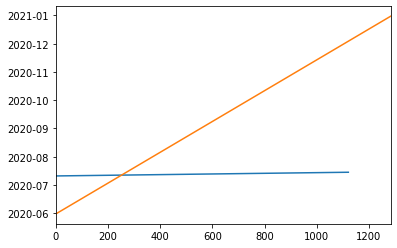

In [154]:
df1["DH5MN_date"].plot()
df2["FT_TURNO_INICIO_ST"].plot()
plt.show()

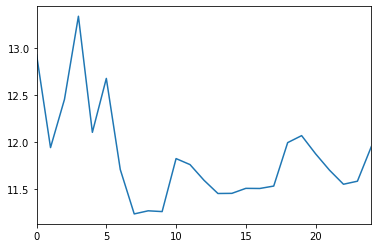

In [155]:
merge_df["RRM"].plot()
plt.show()

In [156]:
df1.head()

,INDPOT,DH5MN,IMFC,UMFC,RMFC,DH5MN_date,FT_TURNO_INICIO
0,1,2020-07-11 06:51:37,219.9,4.316,12.181,2020-07-11 06:51:37,2020-07-11 06:51:37
1,1,2020-07-11 06:56:37,218.9,4.294,12.116,2020-07-11 06:56:37,2020-07-11 06:56:37
2,1,2020-07-11 07:01:39,212.6,4.179,11.827,2020-07-11 07:01:39,2020-07-11 07:01:39
3,1,2020-07-11 07:07:40,NaN,4.224,11.954,2020-07-11 07:07:40,2020-07-11 07:07:40
4,1,2020-07-11 07:12:40,216.4,4.267,12.099,2020-07-11 07:12:40,2020-07-11 07:12:40


In [157]:
df2.head()

,INDPOT,FT_TURNO,TU_SEMI_TURNO,CUBA,RRM,AGEBSQ,FT_TURNO_date,TU_SEMI_TURNO_delta,FT_TURNO_INICIO_ST,FT_TURNO_FIN_ST
0,1,2019-06-01 00:00:00,1,7001,12.0251,2321.9167,2019-06-01,365 days 05:00:00,2020-05-31 05:00:00,2020-05-31 09:00:00
1,1,2019-06-01 00:00:00,2,7001,11.8786,2322.0833,2019-06-01,365 days 09:00:00,2020-05-31 09:00:00,2020-05-31 13:00:00
2,1,2019-06-01 00:00:00,3,7001,11.7247,2322.2500,2019-06-01,365 days 13:00:00,2020-05-31 13:00:00,2020-05-31 17:00:00
3,1,2019-06-01 00:00:00,4,7001,11.7940,2322.4167,2019-06-01,365 days 17:00:00,2020-05-31 17:00:00,2020-05-31 21:00:00
4,1,2019-06-01 00:00:00,5,7001,11.8917,2322.5833,2019-06-01,365 days 21:00:00,2020-05-31 21:00:00,2020-06-01 01:00:00


In [161]:
df_aux1 = pd.DataFrame({"A":[0,0,1,1,2,2,3,3],"B":[0,1,2,3,4,5,6,7]})
df_aux2 = pd.DataFrame({"A":[0,1,2,3],"C":[8,7,6,5]})

In [162]:
df_aux1

,A,B
0,0,0
1,0,1
2,1,2
3,1,3
4,2,4
5,2,5
6,3,6
7,3,7


In [163]:
df_aux2

,A,C
0,0,8
1,1,7
2,2,6
3,3,5


In [164]:
pd.merge(df_aux1, df_aux2,left_on="A", right_on="A")

,A,B,C
0,0,0,8
1,0,1,8
2,1,2,7
3,1,3,7
4,2,4,6
5,2,5,6
6,3,6,5
7,3,7,5
